In [6]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from learn_KKL.system import QuanserQubeServo2

In [7]:
system = QuanserQubeServo2()

In [8]:
import os, sys, pathlib
print(os.getcwd())

/Users/mona/PhD_code/learn_observe_KKL/src/jupyter_notebooks


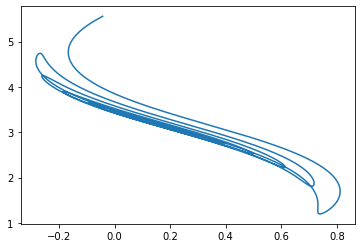

In [9]:
# Simulation params
dt = 0.004
tsim = (0, 2000 * dt)

# Experiment
# fileName = 'example_csv_fin1'
# path = ' /Users/mona/PhD_code/learn_observe_KKL/Data/QQS2_data_diffx0/' + fileName + '.csv'
path = '/Users/mona/PhD_code/learn_observe_KKL/Data/QQS2_data_diffx0/example_csv_fin1.csv'
exp = np.genfromtxt(path, delimiter=',')
exp = exp[1:2001, 1:-1]
exp = system.remap_hardware(exp)

# Simulation
x0 = torch.from_numpy(exp[0])
tq, simu = system.simulate(x_0=x0, tsim=tsim, dt=dt)
simu = system.remap(simu)

# Plot phase potrait
plt.plot(simu[:,0], simu[:,1])
plt.show()

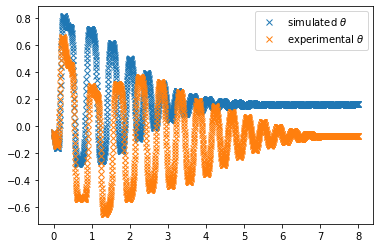

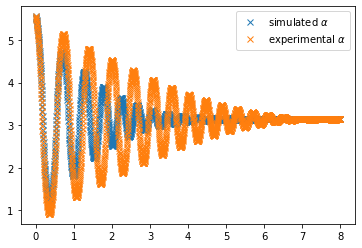

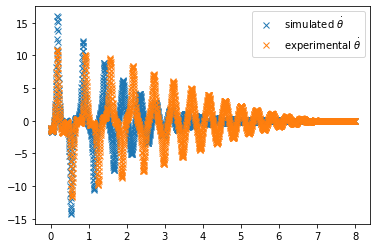

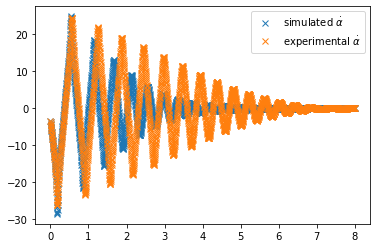

In [10]:
# Compare both
plt.plot(tq, simu[:, 0], 'x', label=r'simulated $\theta$')
plt.plot(tq, exp[:, 0], 'x', label=r'experimental $\theta$')
plt.legend()
# plt.savefig(path + '_theta.pdf', bbox_inches="tight")
plt.show()
plt.clf()
plt.close('all')
plt.plot(tq, simu[:, 1], 'x', label=r'simulated $\alpha$')
plt.plot(tq, exp[:, 1], 'x', label=r'experimental $\alpha$')
plt.legend()
# plt.savefig(path + '_alpha.pdf', bbox_inches="tight")
plt.show()
plt.clf()
plt.close('all')
plt.plot(tq, simu[:, 2], 'x', label=r'simulated $\dot{\theta}$')
plt.plot(tq, exp[:, 2], 'x', label=r'experimental $\dot{\theta}$')
plt.legend()
# plt.savefig(path + '_thetadot.pdf', bbox_inches="tight")
plt.show()
plt.clf()
plt.close('all')
plt.plot(tq, simu[:, 3], 'x', label=r'simulated $\dot{\alpha}$')
plt.plot(tq, exp[:, 3], 'x', label=r'experimental $\dot{\alpha}$')
plt.legend()
# plt.savefig(path + '_alphadot.pdf', bbox_inches="tight")
plt.show()
plt.clf()
plt.close('all')
